# Final assignment Unsupervised Learning

## Background information

This data is from a study of [NSCLC-Radiomics-Genomics](https://wiki.cancerimagingarchive.net/display/Public/NSCLC-Radiomics-Genomics#16056856db10d39adf704eefa53e41edcf5ef41c) and it contains information on 89 patients with non-small cell lung cancer (NSCLC) that were treated with surgery. There are two files, one containing gene expression data and another containing metadata. Both need to be fused before beginning analysis.

# Loading in the data

### Gene Expression data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/GSE58661_series_matrix.txt.gz', compression='gzip', header=61, sep='\t', quotechar='"')
df_test = df.set_index('ID_REF').transpose().drop('!series_matrix_table_end', axis=1)
df_test

ID_REF,AFFX-BioB-3_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioC-3_at,AFFX-BioC-5_at,AFFX-BioDn-3_at,AFFX-BioDn-5_at,AFFX-BkGr-GC03_at,AFFX-BkGr-GC04_at,AFFX-BkGr-GC05_at,...,merck2-Z41436_at,merck2-Z43503_at,merck2-Z47244_x_at,merck2-Z47250_x_at,merck2-Z48501_s_at,merck2-Z48633_s_at,merck2-Z70222_a_at,merck2-Z70608_x_at,merck2-Z72499_a_at,merck2-Z75331_a_at
GSM1416528,7.376915,6.984530,7.330576,10.922741,11.032030,13.411168,12.625445,1.464847,1.416673,1.438285,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
GSM1416529,8.024915,7.427048,8.010530,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,1.403564,...,7.552333,3.578359,5.516440,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
GSM1416530,7.522543,7.077207,7.334551,10.936703,11.018510,13.360017,12.540647,1.355337,1.343599,1.306212,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.586540,6.112918,1.753519,9.515653,6.556233
GSM1416531,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,1.354529,...,7.136409,2.904756,5.954062,6.738276,11.240300,10.257621,6.276813,1.889742,9.383670,7.293852
GSM1416532,7.211031,6.753131,7.077163,10.701328,10.823792,13.340075,12.420624,1.296788,1.244117,1.291959,...,7.667150,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1416612,7.215856,6.740992,7.152722,10.707980,10.842697,13.332414,12.397369,1.443620,1.342957,1.380656,...,6.044094,3.333540,8.953402,10.221695,11.252406,11.010846,6.493021,1.924313,9.223950,5.817185
GSM1416613,7.465109,7.080787,7.422373,10.736531,10.900509,13.285086,12.356609,1.491890,1.450109,1.436852,...,5.277468,2.861520,6.342812,6.896812,11.694623,9.975013,7.952822,1.783032,9.481911,7.487134
GSM1416614,7.245458,6.725812,7.263596,10.770440,10.838008,13.469373,12.566290,1.441152,1.348752,1.356916,...,7.196013,3.903299,5.724736,5.820700,11.692384,10.044351,6.978308,1.371800,9.632680,7.410402
GSM1416615,7.039592,6.575376,6.975162,10.367009,10.494806,13.214522,12.108750,1.460382,1.362631,1.360318,...,2.952597,2.844055,7.236876,8.625332,10.826930,8.798358,7.460604,1.811532,9.313734,6.396247


In [3]:
# print the shape
print("Shape before dropping na's:", df.shape)
# remove last row as it does not contain values
df = df.dropna()
# dropping na's seems to only drop a single row
print("Shape after dropping na's:", df.shape)

Shape before dropping na's: (60608, 90)
Shape after dropping na's: (60607, 90)


### Meta data

In [4]:
meta = pd.read_excel('data/Lung3.metadata.xls')
meta.head()

,sample.name,title,CEL.file,source.location,organism,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.primaryVSmets,characteristics.tag.grade,molecule tested,label,platform
0,LUNG3-01,lung_1,LUNG3-01.CEL,Left Lower Lobe,Homo sapiens,M,"Squamous Cell Carcinoma, NOS",4.0,pT2,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
1,LUNG3-02,lung_2,LUNG3-02.CEL,Left Lower Lobe,Homo sapiens,M,"Adenocarcinoma, Papillary, NOS",1.3,pT1,pNX,pMX,Primary,Not Available,total RNA,biotin,GPL15048
2,LUNG3-03,lung_3,LUNG3-03.CEL,Left Lower Lobe,Homo sapiens,M,Non-Small Cell,11.0,pT3,pN0,pM0,Primary,3,total RNA,biotin,GPL15048
3,LUNG3-04,lung_4,LUNG3-04.CEL,Left Lower Lobe,Homo sapiens,M,"Papillary Type AND Adenocarcinoma, Bronch...",NaN,pTX,pNx,pM1,Primary,Not Available,total RNA,biotin,GPL15048
4,LUNG3-05,lung_5,LUNG3-05.CEL,Left Lower Lobe,Homo sapiens,F,"Squamous Cell Carcinoma, NOS",7.8,pT3,pN0,pM0,Primary,2,total RNA,biotin,GPL15048


## Data exploration

### Meta data exploration

In [5]:
meta.shape

(89, 16)

In [6]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   sample.name                                     89 non-null     object 
 1   title                                           89 non-null     object 
 2   CEL.file                                        89 non-null     object 
 3   source.location                                 89 non-null     object 
 4   organism                                        89 non-null     object 
 5   characteristics.tag.gender                      89 non-null     object 
 6   characteristics.tag.histology                   89 non-null     object 
 7   characteristics.tag.tumor.size.maximumdiameter  88 non-null     float64
 8   characteristics.tag.stage.primary.tumor         89 non-null     object 
 9   characteristics.tag.stage.nodes              

Clearly, most of the meta-data is labels/catergorical data. Features such as organism are redundant considering it was done only to humans and other features also only have a single value/label. For this reason, 'organism', 'characteristics.tag.primaryVSmets', 'molecule tested', 'label' and 'platform' will be dropped. The first three rows also are only used for identification and can be dropped as well.

In [43]:
meta_filtered = meta.drop(['sample.name',
                           'title',
                           'CEL.file',
                           'organism',
                          'characteristics.tag.primaryVSmets',
                          'molecule tested',
                          'label',
                          'platform'], axis=1)

meta_filtered.replace('Not Available', np.nan, inplace=True)
meta_filtered['characteristics.tag.grade'] = meta_filtered['characteristics.tag.grade'].astype('float')

In [44]:
meta_filtered.dtypes

source.location                                    object
characteristics.tag.gender                         object
characteristics.tag.histology                      object
characteristics.tag.tumor.size.maximumdiameter    float64
characteristics.tag.stage.primary.tumor            object
characteristics.tag.stage.nodes                    object
characteristics.tag.stage.mets                     object
characteristics.tag.grade                         float64
dtype: object

In [108]:
for col in meta_filtered.columns:
    print(meta_filtered[col].dtypes != 'object')

False
False
False
True
False
False
False
True


The meta-data currently is categorical, a statistical test cannot work with this, for this reason the labels will be mapped to values.

In [114]:
def mapping_dict(df):
    """
    Creates a dict for remapping non-numeric columns.
    """
    
    col_dict = {}
    for col in df.columns:
        if df[col].dtypes != 'object':
            pass
        else:
            u_vals = df[col].unique()
            count = -1.0
            unique_dict = {}
            for val in u_vals:
                count += 1.0
                unique_dict[val] = count

            col_dict[col] = unique_dict

    return col_dict

def df_remapper(df, map_dict):
    """
    Uses a dictionairy to remap all non-numeric columns
    """
    for col in df.columns:
        if df[col].dtypes != 'object':
            pass
        else:
            df[col] = df[col].map(map_dict[col])
    return df


mapdict = mapping_dict(meta_filtered)
df_mapped = df_remapper(meta_filtered, mapdict)
df_mapped

,source.location,characteristics.tag.gender,characteristics.tag.histology,characteristics.tag.tumor.size.maximumdiameter,characteristics.tag.stage.primary.tumor,characteristics.tag.stage.nodes,characteristics.tag.stage.mets,characteristics.tag.grade
0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0
1,0.0,0.0,1.0,1.3,1.0,1.0,1.0,NaN
2,0.0,0.0,2.0,11.0,2.0,0.0,0.0,3.0
3,0.0,0.0,3.0,NaN,3.0,2.0,2.0,NaN
4,0.0,1.0,0.0,7.8,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
84,3.0,0.0,8.0,2.2,10.0,0.0,0.0,NaN
85,3.0,0.0,0.0,5.0,2.0,5.0,0.0,3.0
86,4.0,0.0,15.0,3.5,0.0,0.0,0.0,2.0
87,3.0,0.0,16.0,8.5,2.0,0.0,0.0,NaN


In [73]:
mapdict

{'source.location': {'Left  Lower Lobe': 0.0,
  'Right    Lower Lobe': 1.0,
  'Left  Upper Lobe': 2.0,
  'Right    Upper Lobe': 3.0,
  'Right    Middle Lobe': 4.0},
 'characteristics.tag.gender': {'M': 0.0, 'F': 1.0},
 'characteristics.tag.histology': {'Squamous Cell Carcinoma, NOS': 0.0,
  'Adenocarcinoma, Papillary, NOS': 1.0,
  'Non-Small Cell': 2.0,
  'Papillary Type AND \xa0\xa0\xa0\xa0 Adenocarcinoma, Bronchiolo-alveolar Features': 3.0,
  'Adenocarcinoma, NOS': 4.0,
  'Solid Type And Acinar': 5.0,
  'Adenocarcinoma, Mixed': 6.0,
  'Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features': 7.0,
  'Adenocarcinoma, Acinar Type': 8.0,
  'Squamous Cell Carcinoma, Other (Specify) with adeno features': 9.0,
  'Adenocarcinoma With Mucinous Features': 10.0,
  'Adenocarcinoma, Bronchiolo-alveolar Features': 11.0,
  'Adenocarcinoma With Papillary Features': 12.0,
  'Carcinoma, Large Cell, Neuroendocrine': 13.0,
  'Squamous Cell Carcinoma, Other (Specify)endobronchial': 14.0,
  'Squamous 

### Gene Expression Data

In [9]:
df.shape

(60607, 90)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60607 entries, 0 to 60606
Data columns (total 90 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_REF      60607 non-null  object 
 1   GSM1416528  60607 non-null  float64
 2   GSM1416529  60607 non-null  float64
 3   GSM1416530  60607 non-null  float64
 4   GSM1416531  60607 non-null  float64
 5   GSM1416532  60607 non-null  float64
 6   GSM1416533  60607 non-null  float64
 7   GSM1416534  60607 non-null  float64
 8   GSM1416535  60607 non-null  float64
 9   GSM1416536  60607 non-null  float64
 10  GSM1416537  60607 non-null  float64
 11  GSM1416538  60607 non-null  float64
 12  GSM1416539  60607 non-null  float64
 13  GSM1416540  60607 non-null  float64
 14  GSM1416541  60607 non-null  float64
 15  GSM1416542  60607 non-null  float64
 16  GSM1416543  60607 non-null  float64
 17  GSM1416544  60607 non-null  float64
 18  GSM1416545  60607 non-null  float64
 19  GSM1416546  60607 non-nul

There seem to be 90 columns, where 1 one them is a ID. This definitly is a very large number of dimensions and possibly needs to be scaled down.

In [ ]:
df.describe()

Looking at the values, all columns seem to have a range from around 1 to 12. Counts also are equal for all features (60607.00)
Considering these factors, there is likely no need for normalization.

In [11]:
df_unlabel = df.drop('ID_REF', axis=1)  # create unlabeled dataframe
df_label = df['ID_REF']  # save labels to variable

df_unlabel.head()

,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,GSM1416537,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
0,7.376915,8.024915,7.522543,7.152864,7.211031,7.704962,7.779374,7.136893,7.160221,8.141578,...,7.611992,7.345206,7.316975,7.418340,7.756286,7.215856,7.465109,7.245458,7.039592,7.393667
1,6.984530,7.427048,7.077207,6.849513,6.753131,7.195947,7.429800,6.745630,6.751358,7.632631,...,7.175015,7.014479,6.913879,6.898449,7.347570,6.740992,7.080787,6.725812,6.575376,7.041106
2,7.330576,8.010530,7.334551,7.143286,7.077163,7.753484,7.712429,7.036303,7.089186,7.992361,...,7.612393,7.285821,7.324635,7.408880,7.745624,7.152722,7.422373,7.263596,6.975162,7.366620
3,10.922741,11.390638,10.936703,10.791909,10.701328,11.221732,11.084229,10.588372,10.628909,11.412668,...,11.097486,10.908682,10.781228,10.935723,11.200635,10.707980,10.736531,10.770440,10.367009,10.753221
4,11.032030,11.533338,11.018510,10.875259,10.823792,11.276973,11.178643,10.700420,10.779332,11.470336,...,11.265739,10.990373,10.900765,11.101546,11.343329,10.842697,10.900509,10.838008,10.494806,10.863600


A correlation matrix will be made to investigate correlation within the dataset. Highly correlated features can be removed as these only bring redundant information. This is preferably removed to create a simpler model with less features.

In [12]:
corr_matrix = df.corr(
    method = 'pearson',  # Correlation method
    min_periods = 1      # Min number of observations required
)

# set diagonal to 0.0 to remove self-correlation
np.fill_diagonal(corr_matrix.values, 0.0)

corr_matrix

,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,GSM1416537,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
GSM1416528,0.000000,0.905686,0.936170,0.913800,0.943755,0.929061,0.928026,0.936719,0.946498,0.927302,...,0.931000,0.911708,0.920464,0.916511,0.924453,0.929644,0.936098,0.953463,0.917823,0.924992
GSM1416529,0.905686,0.000000,0.914099,0.930735,0.923390,0.941845,0.897634,0.929862,0.929474,0.930044,...,0.939771,0.934556,0.944331,0.942702,0.948121,0.943859,0.927664,0.904587,0.899879,0.927677
GSM1416530,0.936170,0.914099,0.000000,0.907556,0.929654,0.927993,0.918772,0.927318,0.933025,0.926291,...,0.917914,0.920197,0.917016,0.915377,0.921033,0.929824,0.926817,0.927032,0.907519,0.918858
GSM1416531,0.913800,0.930735,0.907556,0.000000,0.915737,0.940047,0.876356,0.940638,0.931547,0.920848,...,0.952845,0.919223,0.959123,0.950188,0.946053,0.940971,0.924795,0.912148,0.907469,0.925122
GSM1416532,0.943755,0.923390,0.929654,0.915737,0.000000,0.948284,0.922983,0.945173,0.948752,0.935854,...,0.936900,0.914244,0.932735,0.924951,0.938563,0.940427,0.955618,0.942259,0.921148,0.945728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1416612,0.929644,0.943859,0.929824,0.940971,0.940427,0.963830,0.899635,0.954138,0.961016,0.959104,...,0.962981,0.937287,0.961298,0.950431,0.966825,0.000000,0.952749,0.923960,0.929944,0.960543
GSM1416613,0.936098,0.927664,0.926817,0.924795,0.955618,0.953761,0.919901,0.944126,0.955724,0.943455,...,0.941420,0.924980,0.945472,0.931186,0.949603,0.952749,0.000000,0.936654,0.930063,0.954915
GSM1416614,0.953463,0.904587,0.927032,0.912148,0.942259,0.919981,0.934657,0.933844,0.938591,0.917838,...,0.920050,0.905931,0.920573,0.915009,0.918655,0.923960,0.936654,0.000000,0.917495,0.915337
GSM1416615,0.917823,0.899879,0.907519,0.907469,0.921148,0.936203,0.890329,0.938485,0.932633,0.933755,...,0.924160,0.904958,0.921539,0.911336,0.917875,0.929944,0.930063,0.917495,0.000000,0.931867


In [13]:
# Visualize the most highlt correlated columns
corr_matrix.abs().idxmax()

GSM1416528    GSM1416591
GSM1416529    GSM1416611
GSM1416530    GSM1416590
GSM1416531    GSM1416569
GSM1416532    GSM1416561
                 ...    
GSM1416612    GSM1416573
GSM1416613    GSM1416576
GSM1416614    GSM1416577
GSM1416615    GSM1416597
GSM1416616    GSM1416573
Length: 89, dtype: object

In [14]:
# Check how hight the correlation is.
corr_matrix.abs().max()

GSM1416528    0.965871
GSM1416529    0.948121
GSM1416530    0.940973
GSM1416531    0.962294
GSM1416532    0.964276
                ...   
GSM1416612    0.968475
GSM1416613    0.964296
GSM1416614    0.957338
GSM1416615    0.939989
GSM1416616    0.972426
Length: 89, dtype: float64

In [15]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (df_unlabel.skew().sort_values(ascending=False))
print('-- skew --')
print(skew_columns)
print('\n')

skew_columns_75 = skew_columns.loc[skew_columns > 0.75]
print('-- skew > 0.75 --')
print(skew_columns_75)

print('-- max skew --')
print(skew_columns.max())
print('-- min skew --')
print(skew_columns.min())

-- skew --
GSM1416538    0.587398
GSM1416534    0.515895
GSM1416550    0.501419
GSM1416583    0.483997
GSM1416540    0.470794
                ...   
GSM1416565    0.410797
GSM1416605    0.406244
GSM1416610    0.406080
GSM1416597    0.402599
GSM1416601    0.396689
Length: 89, dtype: float64


-- skew > 0.75 --
Series([], dtype: float64)
-- max skew --
0.5873979080068205
-- min skew --
0.3966893115228518


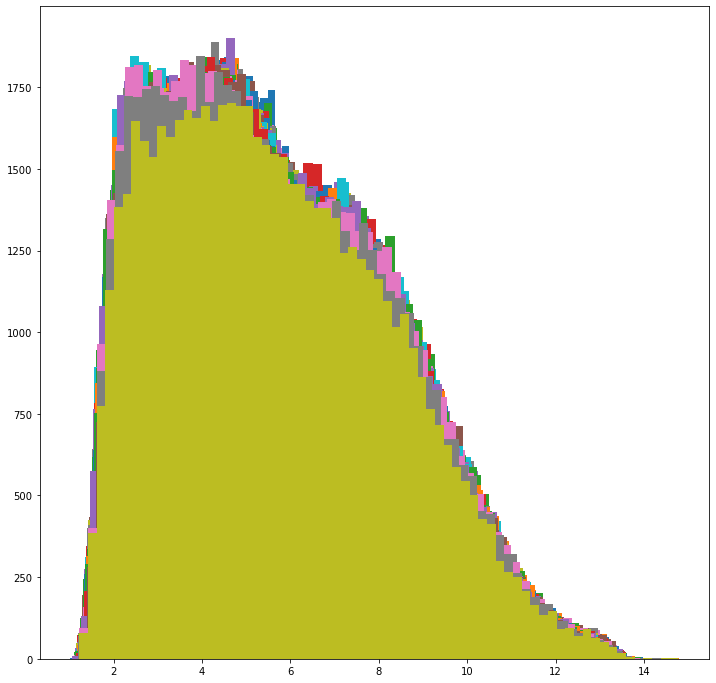

In [16]:
# Plot a histogram to view the data distribution
plt.subplots(figsize =(12, 12))
for col in df_unlabel.columns:
    plt.hist(df_unlabel[col], bins='auto')
plt.show()

According to the above information, the dataset initially seemed to have a slight skew (skew in this dataset varies from 0.39 and 0.58) and after verifying it with a histogram, it clearly seems to be skewed.

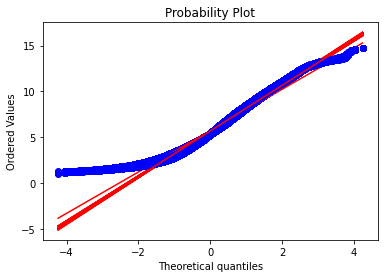

In [17]:
for col in df_unlabel.columns:
    stats.probplot(df_unlabel[col], dist="norm", plot=pylab)
pylab.show()

## Data pre-processing

To resolve the data skewness a number of techniques can be employed, the aim is to get a number as close as possible to zero, such there is minimal skewing in the data.

In [18]:
# log transform
df_log = np.log(df_unlabel)
print('Log transform skew: min: {:.3f}, max: {:.3f}'.format(df_log.skew().min(), df_log.skew().max()))
df_log.head()

Log transform skew: min: -0.425, max: -0.322


,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,GSM1416537,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
0,1.998355,2.082551,2.017904,1.967513,1.975612,2.041865,2.051476,1.965278,1.968541,2.096984,...,2.029725,1.994048,1.990197,2.003955,2.048504,1.976281,2.010240,1.980375,1.951550,2.000624
1,1.943698,2.005129,1.956879,1.924178,1.910006,1.973518,2.005499,1.908895,1.909744,2.032433,...,1.970605,1.947976,1.933531,1.931297,1.994370,1.908207,1.957385,1.905953,1.883332,1.951765
2,1.992054,2.080757,1.992596,1.966173,1.956873,2.048142,2.042833,1.951083,1.958571,2.078486,...,2.029778,1.985930,1.991243,2.002679,2.047128,1.967493,2.004499,1.982875,1.942356,1.996959
3,2.390847,2.432792,2.392124,2.378797,2.370368,2.417852,2.405523,2.359756,2.363578,2.434724,...,2.406719,2.389559,2.377807,2.392035,2.415970,2.370989,2.373652,2.376805,2.338629,2.375205
4,2.400803,2.445242,2.399577,2.386490,2.381747,2.422763,2.414005,2.370283,2.377631,2.439764,...,2.421766,2.397020,2.388833,2.407084,2.428630,2.383492,2.388810,2.383059,2.350880,2.385418


In [19]:
# square root transform
df_sqrt = np.sqrt(df_unlabel)
print('Square root transform skew: min: {:.3f}, max: {:.3f}'.format(df_sqrt.skew().min(), df_sqrt.skew().max()))
df_sqrt.head()

Square root transform skew: min: 0.003, max: 0.146


,GSM1416528,GSM1416529,GSM1416530,GSM1416531,GSM1416532,GSM1416533,GSM1416534,GSM1416535,GSM1416536,GSM1416537,...,GSM1416607,GSM1416608,GSM1416609,GSM1416610,GSM1416611,GSM1416612,GSM1416613,GSM1416614,GSM1416615,GSM1416616
0,2.716048,2.832828,2.742725,2.674484,2.685336,2.775781,2.789153,2.671496,2.675859,2.853345,...,2.758984,2.710204,2.704991,2.723663,2.785011,2.686234,2.732235,2.691739,2.653223,2.719130
1,2.642826,2.725261,2.660302,2.617157,2.598679,2.682526,2.725766,2.597235,2.598338,2.762722,...,2.678622,2.648486,2.629426,2.626490,2.710640,2.596342,2.660975,2.593417,2.564250,2.653508
2,2.707504,2.830288,2.708238,2.672693,2.660294,2.784508,2.777126,2.652603,2.662553,2.827076,...,2.759057,2.699226,2.706406,2.721926,2.783096,2.674457,2.724403,2.695106,2.641053,2.714152
3,3.304957,3.375002,3.307069,3.285104,3.271288,3.349885,3.329299,3.253978,3.260201,3.378264,...,3.331289,3.302829,3.283478,3.306920,3.346735,3.272305,3.276665,3.281835,3.219784,3.279210
4,3.321450,3.396077,3.319414,3.297766,3.289953,3.358120,3.343448,3.271150,3.283189,3.386788,...,3.356447,3.315173,3.301631,3.331898,3.367986,3.292825,3.301592,3.292113,3.239569,3.295998


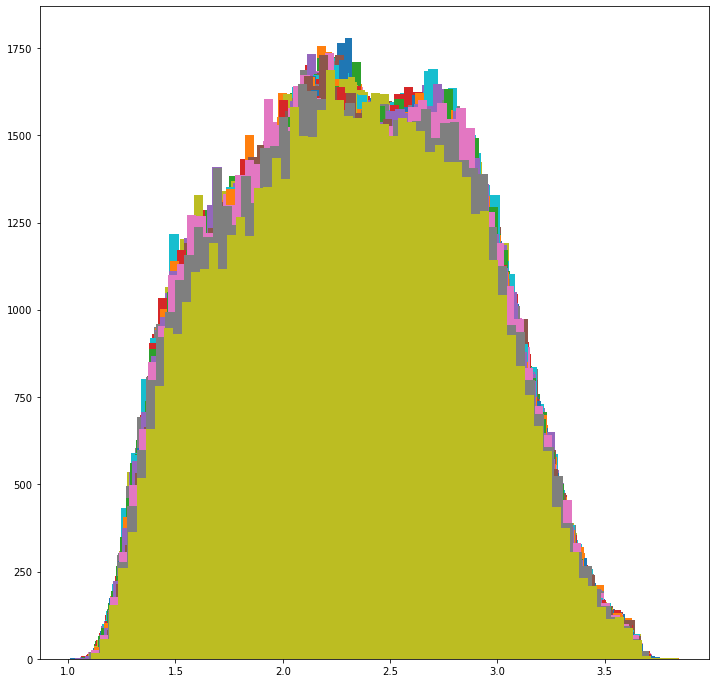

In [20]:
# Plot a histogram to view the data distribution
plt.subplots(figsize =(12, 12))
for col in df_sqrt.columns:
    plt.hist(df_sqrt[col], bins='auto')
plt.show()

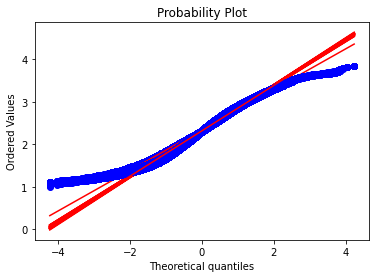

In [21]:
for col in df_sqrt.columns:
    stats.probplot(df_sqrt[col], dist="norm", plot=pylab)
pylab.show()